In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
train = pd.read_csv('SalaryData_Test.csv')
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7204,30,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,1848.0,50.0,United-States,>50K
7205,50,Private,Bachelors,13,Married-spouse-absent,Sales,Not-in-family,White,Female,0.0,0.0,20.0,Germany,<=50K
7206,69,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,20.0,United-States,<=50K
7207,33,Private,Assoc-voc,11,Divorced,Tech-support,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K


In [3]:
test = pd.read_csv('SalaryData_Train.csv.crdownload')
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12810,33,Federal-gov,HS-grad,9,Divorced,Adm-clerical,Unmarried,Black,Female,0,0,35,United-States,<=50K
12811,22,State-gov,Some-college,10,Never-married,Tech-support,Own-child,White,Female,0,0,10,United-States,<=50K
12812,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,44,United-States,<=50K
12813,34,Private,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,Black,Male,0,1902,50,United-States,>50K


In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K


In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train.shape

(7209, 14)

In [7]:
test.shape

(12815, 14)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7209 entries, 0 to 7208
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            7209 non-null   int64  
 1   workclass      7209 non-null   object 
 2   education      7209 non-null   object 
 3   educationno    7209 non-null   int64  
 4   maritalstatus  7209 non-null   object 
 5   occupation     7208 non-null   object 
 6   relationship   7208 non-null   object 
 7   race           7208 non-null   object 
 8   sex            7208 non-null   object 
 9   capitalgain    7208 non-null   float64
 10  capitalloss    7208 non-null   float64
 11  hoursperweek   7208 non-null   float64
 12  native         7208 non-null   object 
 13  Salary         7208 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 788.6+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12815 entries, 0 to 12814
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            12815 non-null  int64 
 1   workclass      12815 non-null  object
 2   education      12815 non-null  object
 3   educationno    12815 non-null  int64 
 4   maritalstatus  12815 non-null  object
 5   occupation     12815 non-null  object
 6   relationship   12815 non-null  object
 7   race           12815 non-null  object
 8   sex            12815 non-null  object
 9   capitalgain    12815 non-null  int64 
 10  capitalloss    12815 non-null  int64 
 11  hoursperweek   12815 non-null  int64 
 12  native         12815 non-null  object
 13  Salary         12814 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.4+ MB


In [10]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,7209.000000,7209.000000,7208.000000,7208.000000,7208.000000
mean,38.584547,10.102649,1190.682020,87.237375,41.002081
std,13.333648,2.567135,8148.620823,402.759137,12.088815
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3175.000000,99.000000


In [11]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,12815.000000,12815.000000,12815.000000,12815.000000,12815.000000
mean,38.369021,10.124385,1071.742801,89.701366,41.022005
std,13.092371,2.531613,7345.516929,404.957869,11.871620
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [12]:
train.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.021058,0.088488,0.061636,0.110881
educationno,0.021058,1.000000,0.139224,0.082999,0.142935
capitalgain,0.088488,0.139224,1.000000,-0.031654,0.098091
capitalloss,0.061636,0.082999,-0.031654,1.000000,0.054204
hoursperweek,0.110881,0.142935,0.098091,0.054204,1.000000


In [13]:
test.corr()

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.031359,0.067571,0.064720,0.100555
educationno,0.031359,1.000000,0.119976,0.083323,0.150482
capitalgain,0.067571,0.119976,1.000000,-0.032321,0.075319
capitalloss,0.064720,0.083323,-0.032321,1.000000,0.052593
hoursperweek,0.100555,0.150482,0.075319,0.052593,1.000000


In [14]:
# Data Preprocessing

In [15]:
lb = LabelEncoder()

In [16]:
train["workclass"] = lb.fit_transform(train["workclass"])
train["education"] = lb.fit_transform(train["education"])
train["maritalstatus"] = lb.fit_transform(train["maritalstatus"])
train["occupation"] = lb.fit_transform(train["occupation"])
train["relationship"] = lb.fit_transform(train["relationship"])
train["race"] = lb.fit_transform(train["race"])
train["sex"] = lb.fit_transform(train["sex"])
train["native"] = lb.fit_transform(train["native"])
train["Salary"] = lb.fit_transform(train["Salary"])

In [17]:
test["workclass"] = lb.fit_transform(test["workclass"])
test["education"] = lb.fit_transform(test["education"])
test["maritalstatus"] = lb.fit_transform(test["maritalstatus"])
test["occupation"] = lb.fit_transform(test["occupation"])
test["relationship"] = lb.fit_transform(test["relationship"])
test["race"] = lb.fit_transform(test["race"])
test["sex"] = lb.fit_transform(test["sex"])
test["native"] = lb.fit_transform(test["native"])
test["Salary"] = lb.fit_transform(test["Salary"])

In [18]:
# EDA


In [19]:
train = train.iloc[: 2000, :]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            2000 non-null   int64  
 1   workclass      2000 non-null   int32  
 2   education      2000 non-null   int32  
 3   educationno    2000 non-null   int64  
 4   maritalstatus  2000 non-null   int32  
 5   occupation     2000 non-null   int32  
 6   relationship   2000 non-null   int32  
 7   race           2000 non-null   int32  
 8   sex            2000 non-null   int32  
 9   capitalgain    2000 non-null   float64
 10  capitalloss    2000 non-null   float64
 11  hoursperweek   2000 non-null   float64
 12  native         2000 non-null   int32  
 13  Salary         2000 non-null   int32  
dtypes: float64(3), int32(9), int64(2)
memory usage: 148.6 KB


In [20]:
test = test.iloc[: 1300, :]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            1300 non-null   int64
 1   workclass      1300 non-null   int32
 2   education      1300 non-null   int32
 3   educationno    1300 non-null   int64
 4   maritalstatus  1300 non-null   int32
 5   occupation     1300 non-null   int32
 6   relationship   1300 non-null   int32
 7   race           1300 non-null   int32
 8   sex            1300 non-null   int32
 9   capitalgain    1300 non-null   int64
 10  capitalloss    1300 non-null   int64
 11  hoursperweek   1300 non-null   int64
 12  native         1300 non-null   int32
 13  Salary         1300 non-null   int32
dtypes: int32(9), int64(5)
memory usage: 96.6 KB


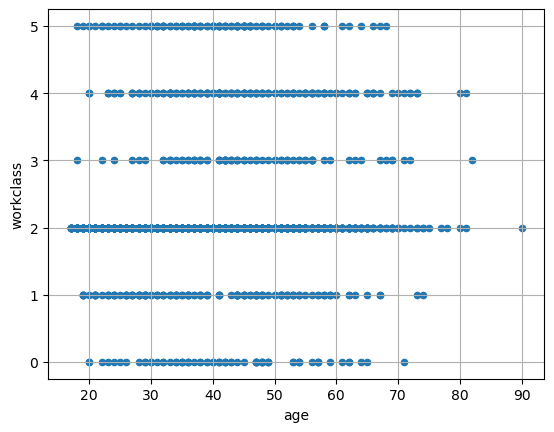

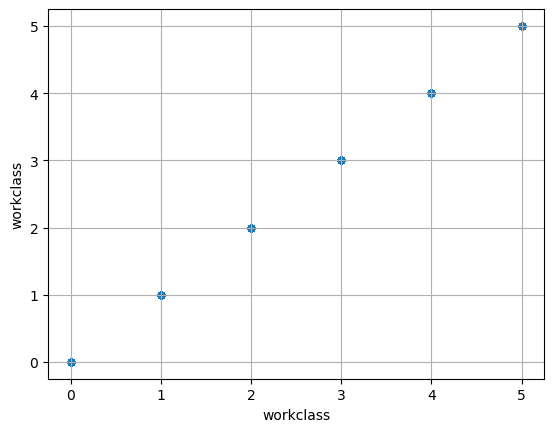

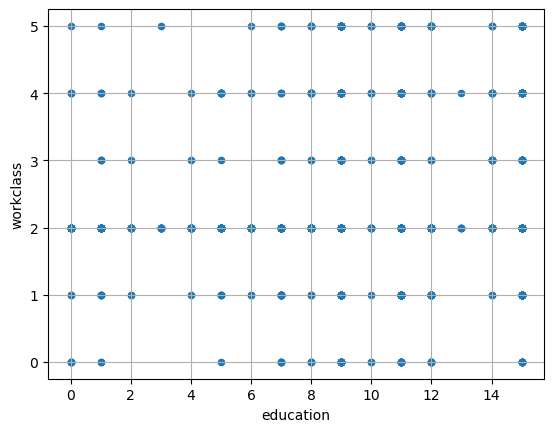

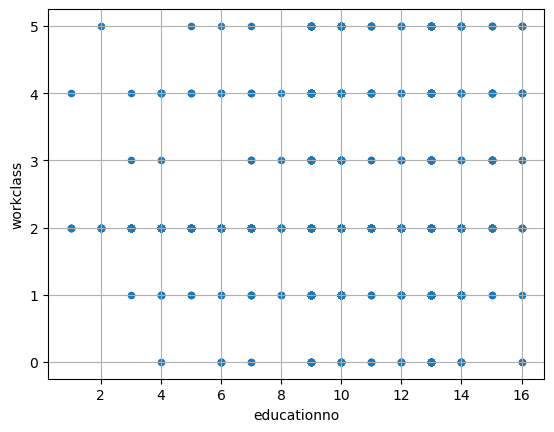

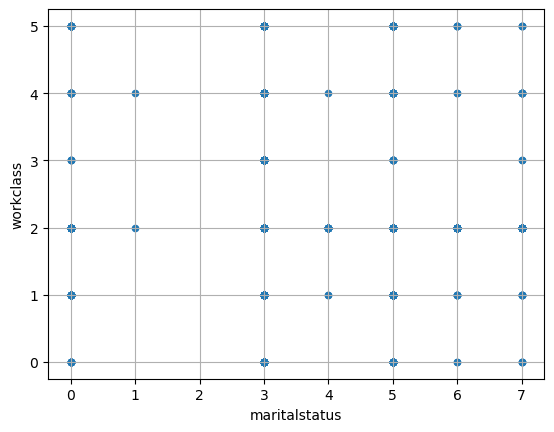

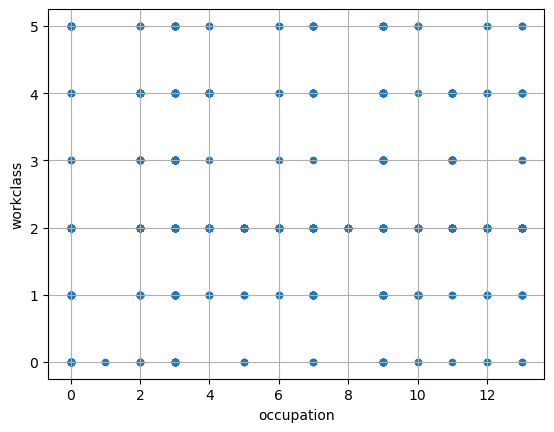

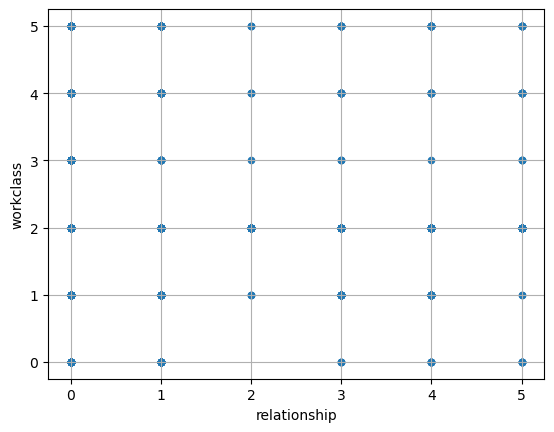

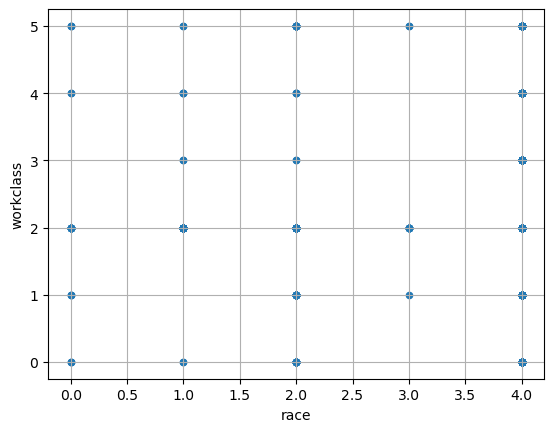

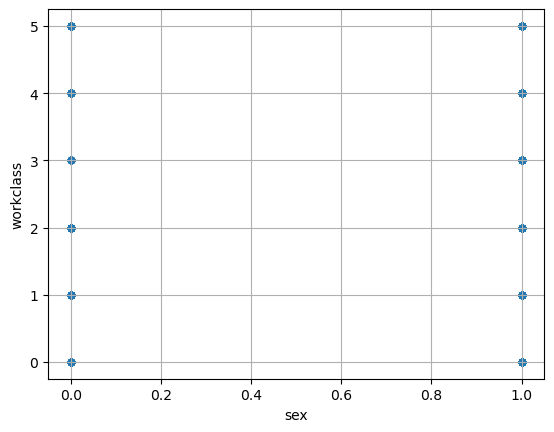

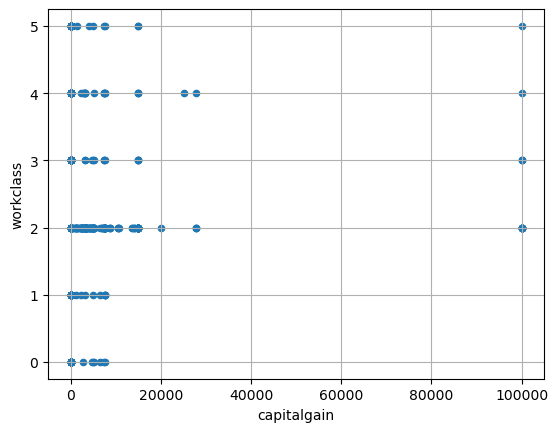

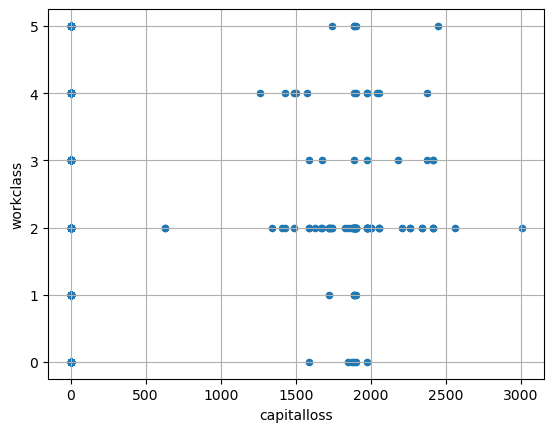

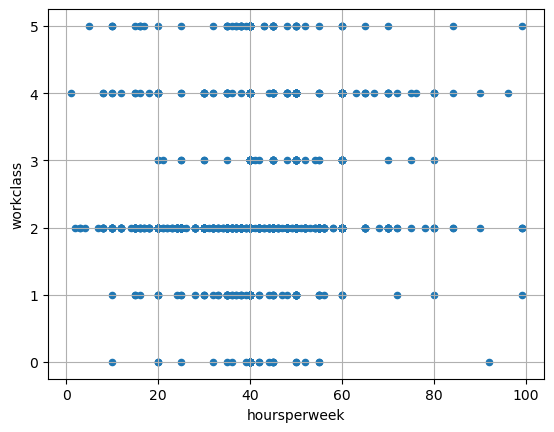

In [21]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'workclass',grid=True)

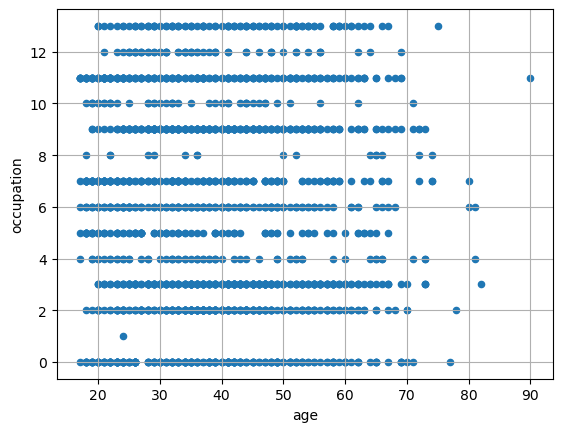

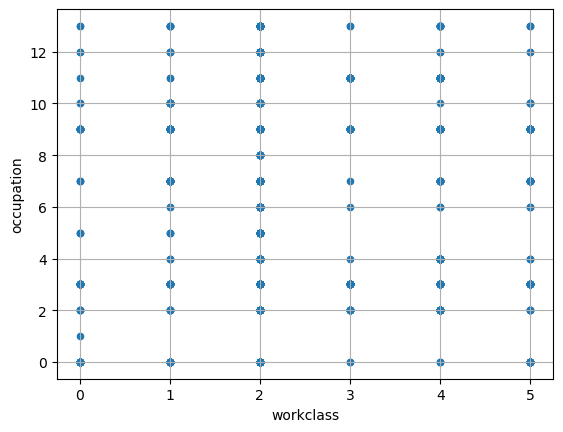

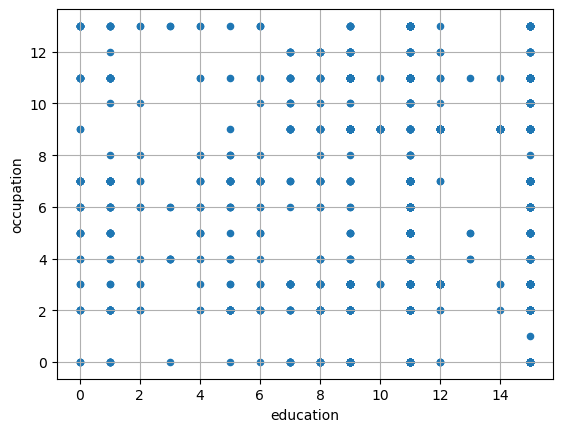

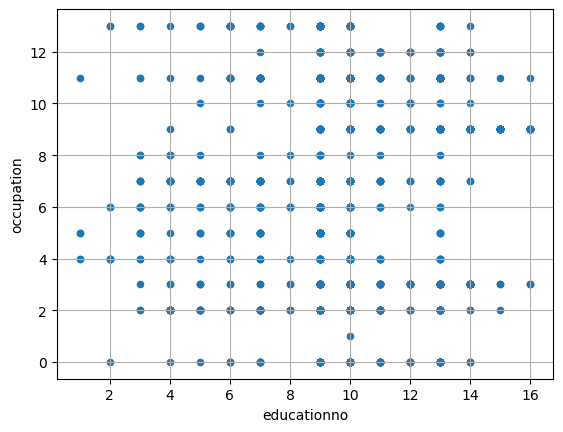

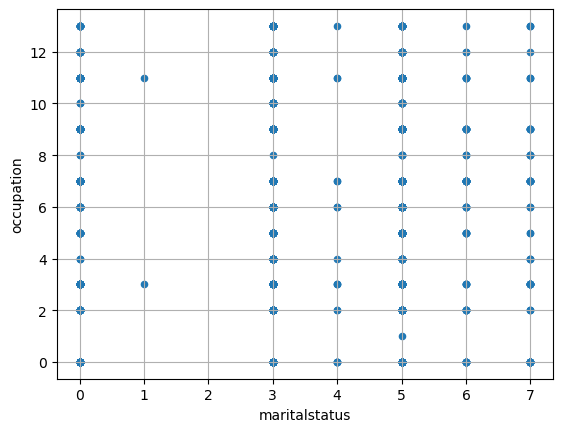

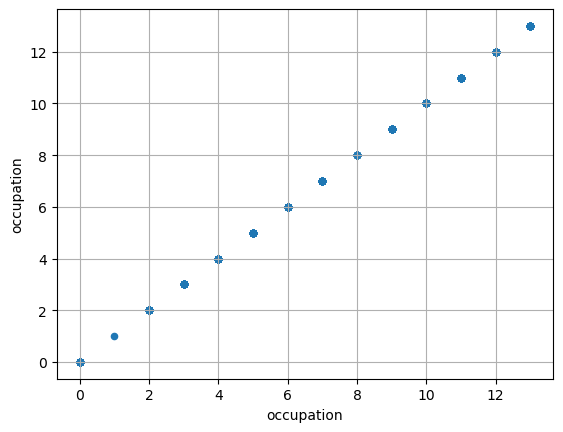

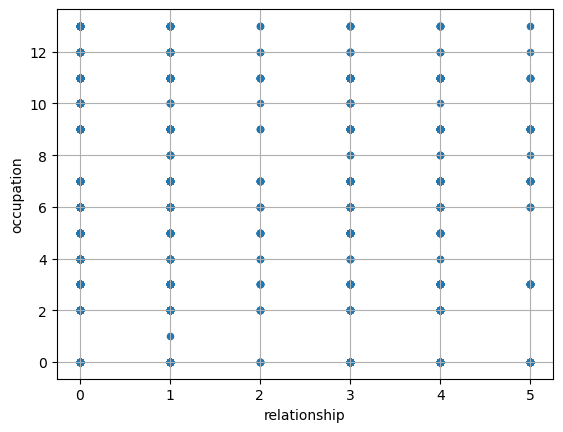

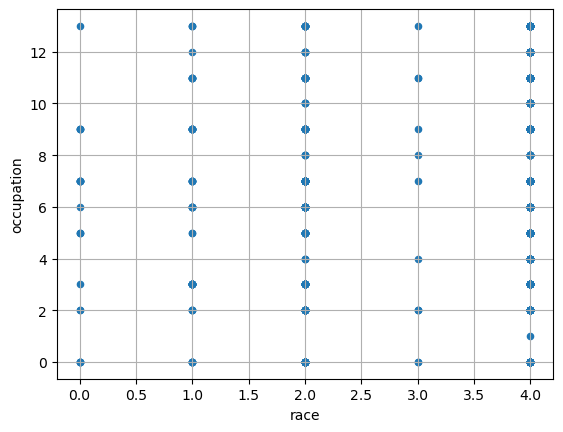

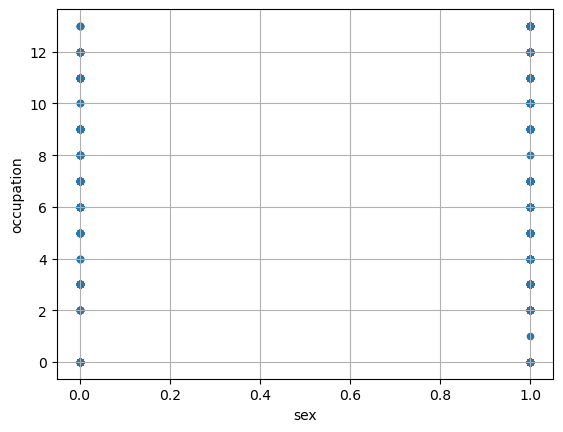

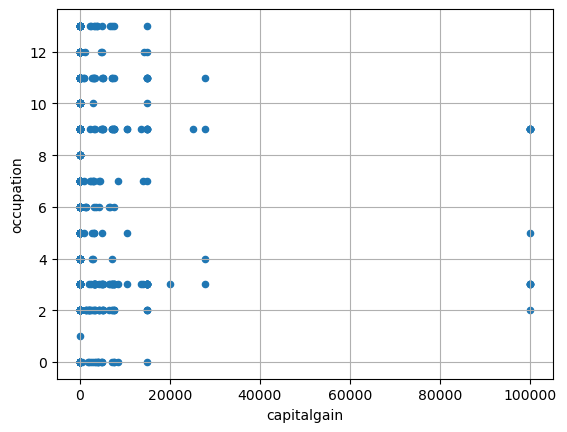

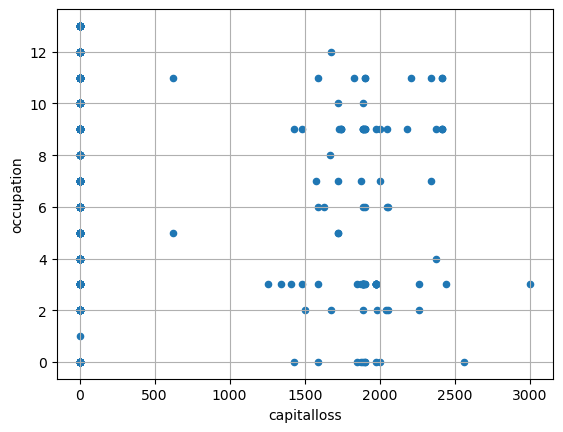

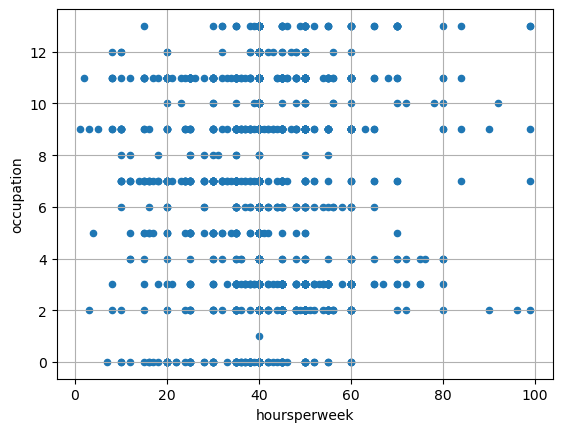

In [22]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'occupation',grid=True)

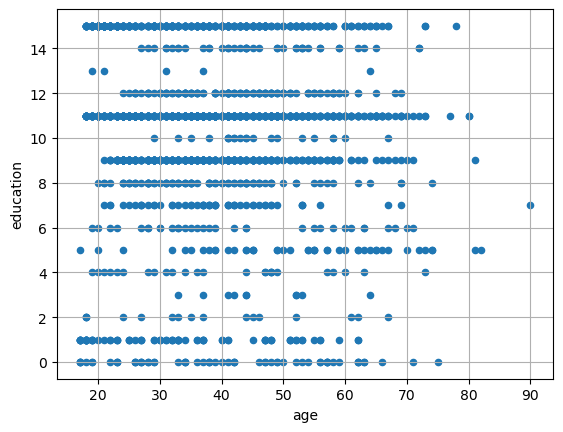

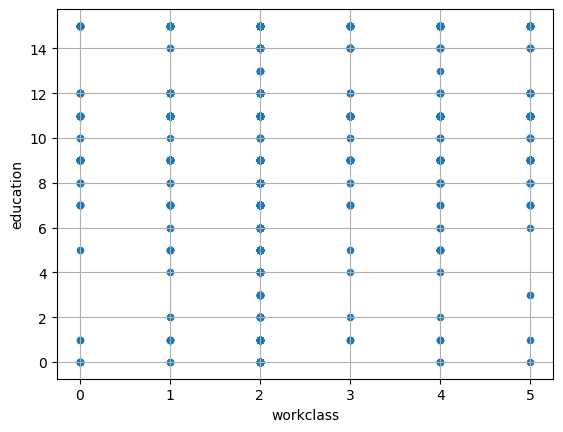

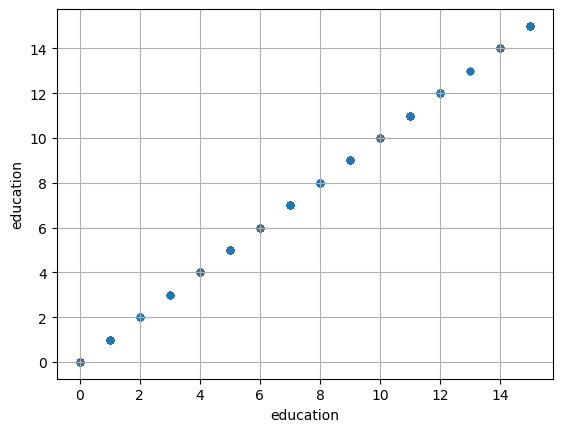

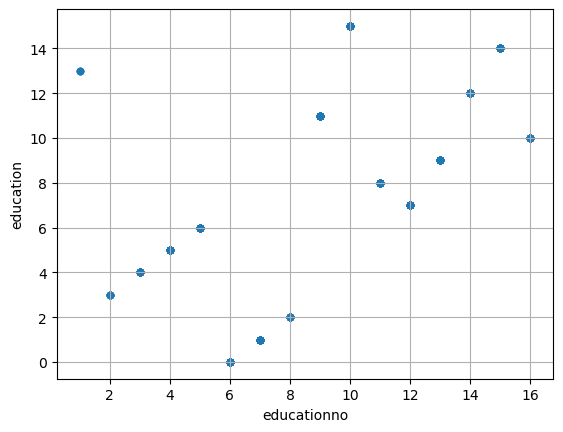

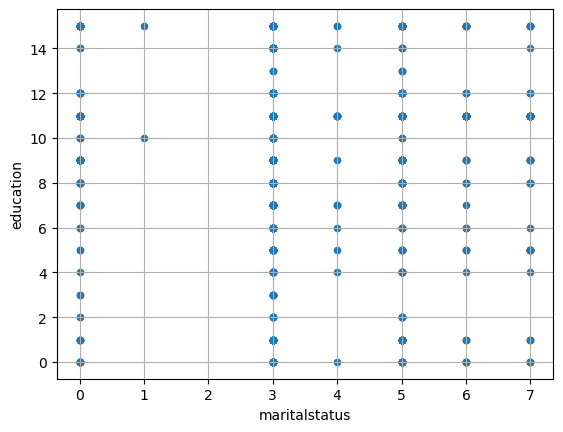

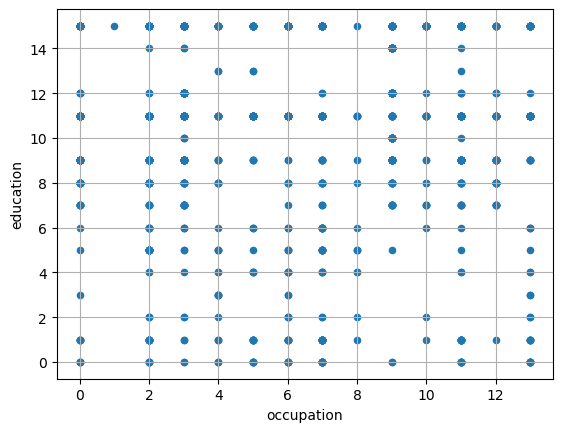

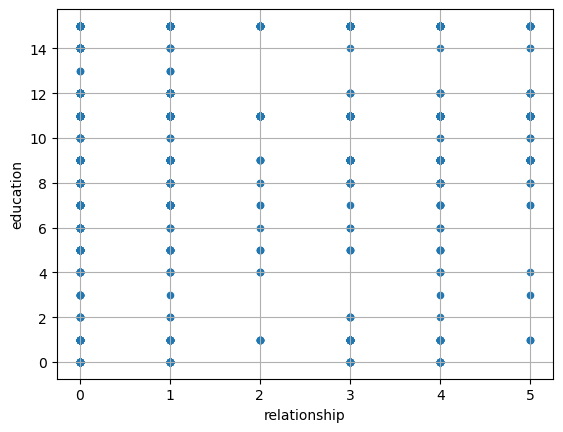

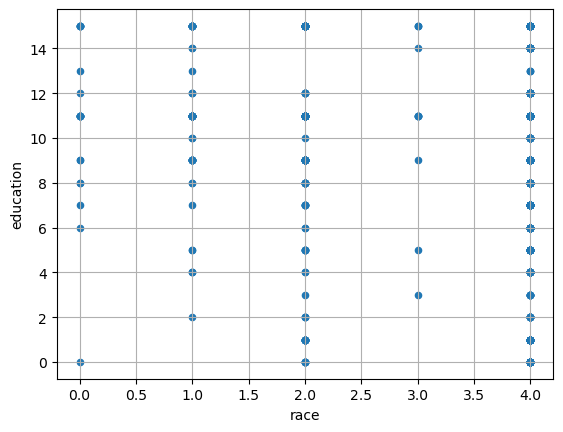

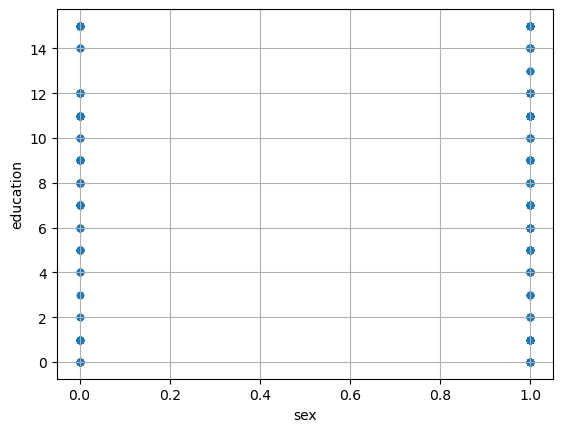

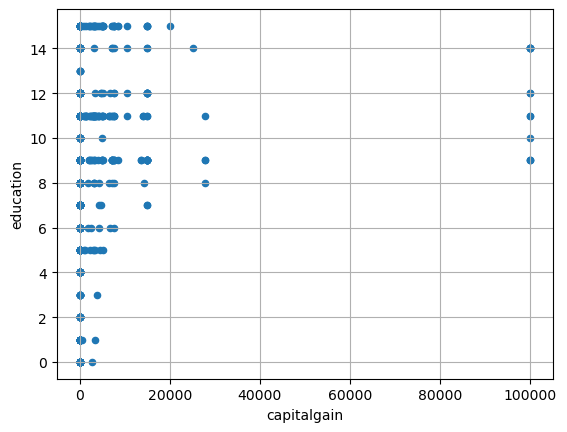

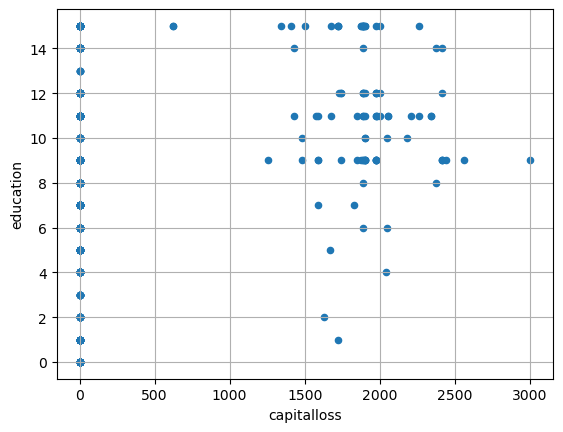

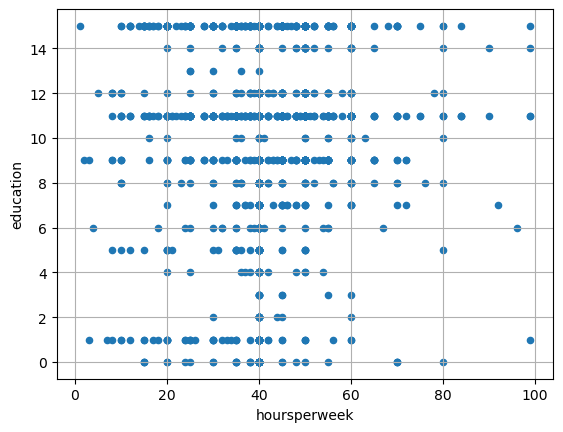

In [23]:
for i in train.describe().columns[:-2]:
    train.plot.scatter(i,'education',grid=True)

In [24]:
train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.102145,-0.067663,-0.010577,-0.253009,-0.032433,-0.235359,0.013387,0.052985,0.080818,0.066299,0.089758,0.028632,0.202369
workclass,0.102145,1.000000,0.072303,0.071085,-0.030366,0.020685,-0.060904,0.049746,0.047493,0.035666,0.021972,0.084331,0.010883,0.057715
education,-0.067663,0.072303,1.000000,0.380574,-0.041739,-0.027401,-0.021588,-0.000134,-0.012436,0.053427,0.039619,0.043915,0.082684,0.107446
educationno,-0.010577,0.071085,0.380574,1.000000,-0.068150,0.079451,-0.051236,0.065272,-0.006249,0.149532,0.111272,0.136683,0.131089,0.330302
maritalstatus,-0.253009,-0.030366,-0.041739,-0.068150,1.000000,-0.023302,0.104319,-0.039579,-0.079812,-0.045288,0.003449,-0.131737,-0.000926,-0.150951
occupation,-0.032433,0.020685,-0.027401,0.079451,-0.023302,1.000000,-0.060867,0.019798,0.062337,0.007396,-0.025065,0.021000,-0.004707,0.013167
relationship,-0.235359,-0.060904,-0.021588,-0.051236,0.104319,-0.060867,1.000000,-0.152606,-0.581357,-0.062047,-0.020785,-0.294024,-0.005507,-0.246045
race,0.013387,0.049746,-0.000134,0.065272,-0.039579,0.019798,-0.152606,1.000000,0.089352,0.007659,0.052039,0.044072,0.147434,0.061567
sex,0.052985,0.047493,-0.012436,-0.006249,-0.079812,0.062337,-0.581357,0.089352,1.000000,0.064832,0.044939,0.264457,-0.025018,0.213186
capitalgain,0.080818,0.035666,0.053427,0.149532,-0.045288,0.007396,-0.062047,0.007659,0.064832,1.000000,-0.034039,0.109488,0.030871,0.236209


In [25]:
test.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
age,1.000000,0.082810,-0.012805,0.023470,-0.242071,-0.008795,-0.222348,0.012393,0.069420,0.094467,0.069359,0.112294,-0.006208,0.235566
workclass,0.082810,1.000000,0.031016,0.081318,-0.045448,0.030169,-0.084738,0.073059,0.101236,0.018042,0.038669,0.029552,-0.021447,0.058983
education,-0.012805,0.031016,1.000000,0.279357,-0.076233,-0.028124,-0.029600,-0.001655,0.001206,0.033709,-0.019719,0.079229,0.087148,0.027085
educationno,0.023470,0.081318,0.279357,1.000000,-0.069777,0.129528,-0.105861,0.062739,0.034932,0.123991,0.059936,0.186050,0.069238,0.325273
maritalstatus,-0.242071,-0.045448,-0.076233,-0.069777,1.000000,0.080904,0.154737,-0.084844,-0.080972,-0.057645,-0.016282,-0.213946,0.000793,-0.199889
occupation,-0.008795,0.030169,-0.028124,0.129528,0.080904,1.000000,-0.052499,0.050838,0.055835,-0.004173,0.019042,0.021919,0.012103,0.021842
relationship,-0.222348,-0.084738,-0.029600,-0.105861,0.154737,-0.052499,1.000000,-0.100516,-0.564539,-0.089995,-0.024553,-0.272978,-0.065237,-0.205675
race,0.012393,0.073059,-0.001655,0.062739,-0.084844,0.050838,-0.100516,1.000000,0.094750,-0.019131,0.021858,0.052252,0.131267,0.072880
sex,0.069420,0.101236,0.001206,0.034932,-0.080972,0.055835,-0.564539,0.094750,1.000000,0.048749,0.034700,0.211010,0.035630,0.177952
capitalgain,0.094467,0.018042,0.033709,0.123991,-0.057645,-0.004173,-0.089995,-0.019131,0.048749,1.000000,-0.036307,0.082818,-0.010125,0.226239


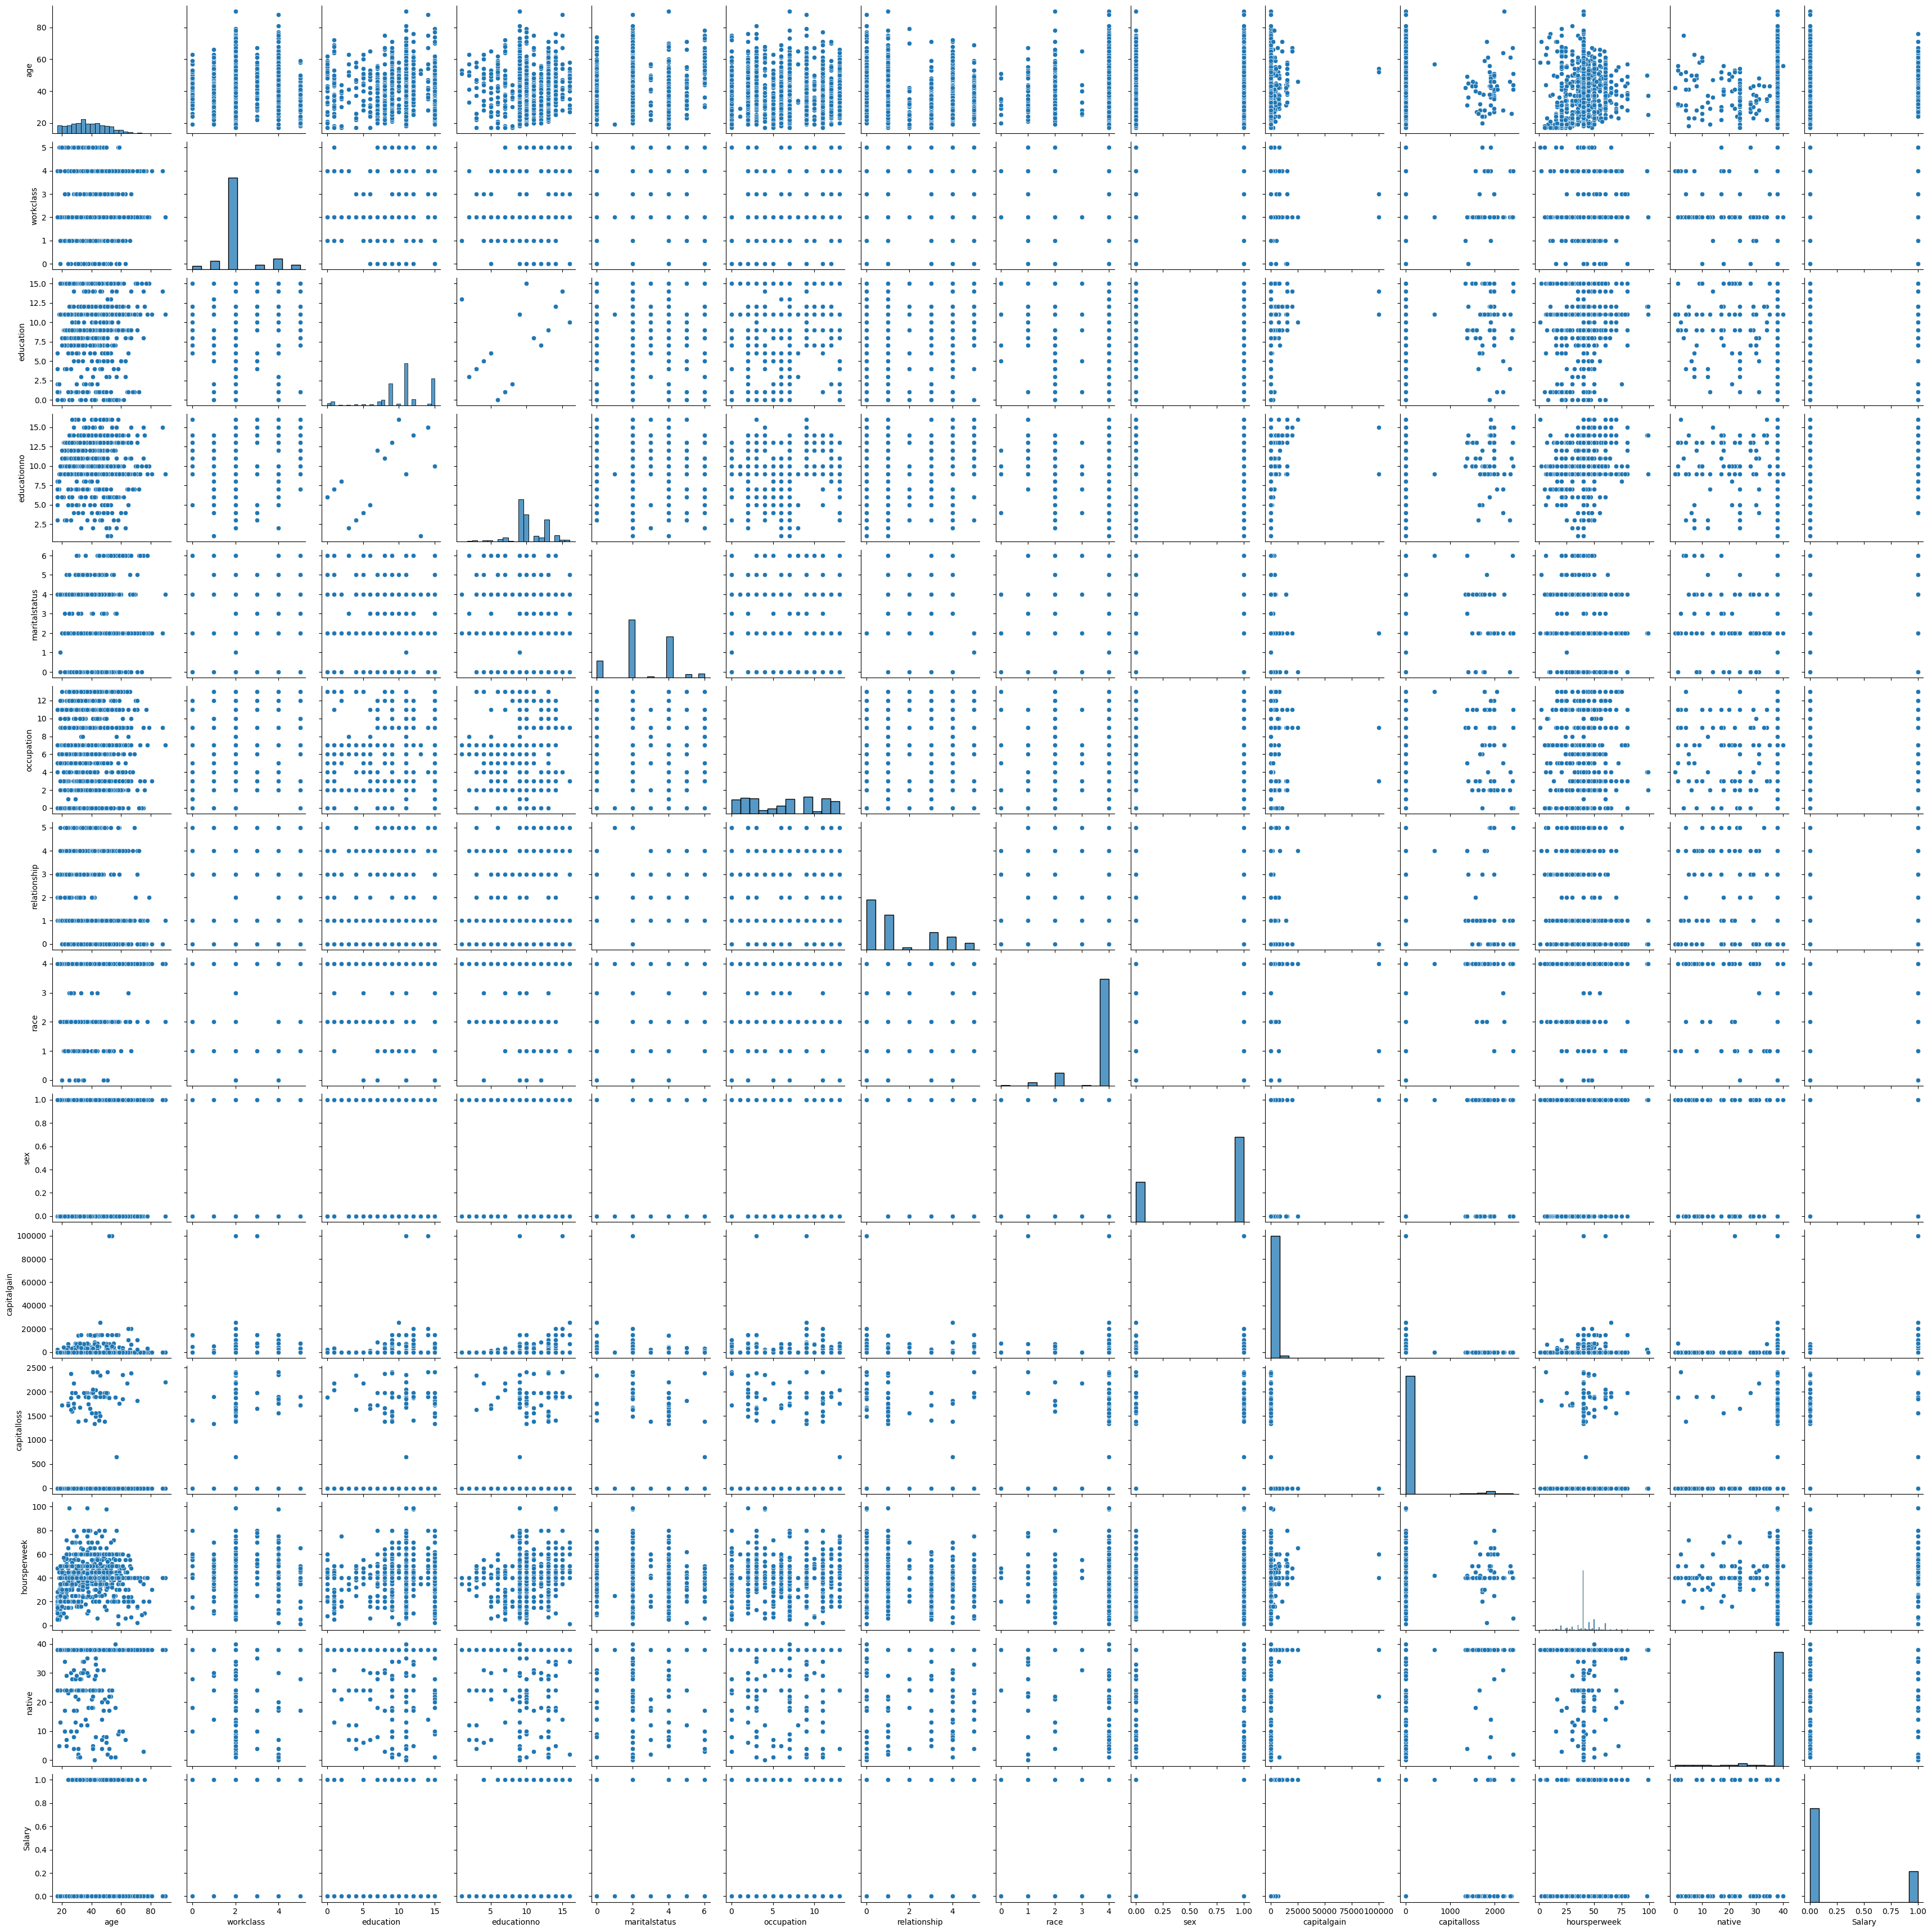

In [26]:
sns.pairplot(test)


In [27]:
# Data Splitting

In [28]:
X_train=train.iloc[:,:-1]
X_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,7,5,6,3,2,1,0.0,0.0,40.0,37
1,38,2,11,9,3,4,0,4,1,0.0,0.0,50.0,37
2,28,1,7,12,3,10,0,4,1,0.0,0.0,40.0,37
3,44,2,15,10,3,6,0,2,1,7688.0,0.0,40.0,37
4,34,2,0,6,5,7,1,4,1,0.0,0.0,30.0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,35,5,8,11,5,2,1,4,1,0.0,0.0,40.0,37
1996,41,2,15,10,3,2,0,4,1,0.0,0.0,45.0,37
1997,43,4,9,13,5,11,3,4,1,0.0,0.0,35.0,37
1998,49,3,14,15,3,9,0,4,1,0.0,0.0,40.0,37


In [29]:
y_train=train.iloc[:,-1]
y_train

0       0
1       0
2       1
3       1
4       0
       ..
1995    0
1996    0
1997    0
1998    1
1999    1
Name: Salary, Length: 2000, dtype: int32

In [30]:
X_test=test.iloc[:,:-1]
X_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,9,13,2,3,0,4,1,0,0,13,38
2,38,2,11,9,0,5,1,4,1,0,0,40,38
3,53,2,1,7,2,5,0,2,1,0,0,40,38
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,43,3,11,9,2,7,0,1,1,0,0,78,35
1296,39,2,9,13,2,9,0,4,1,0,0,40,38
1297,53,2,15,10,2,3,0,4,1,0,0,45,38
1298,52,4,0,6,2,3,0,4,1,0,0,60,38


In [31]:
y_test = test.iloc[:,-1]
y_test

0       0
1       0
2       0
3       0
4       0
       ..
1295    0
1296    1
1297    1
1298    0
1299    0
Name: Salary, Length: 1300, dtype: int32

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2000, 13), (2000,), (1300, 13), (1300,))

In [33]:
# SVM Model

In [34]:
model = SVC()

model.fit(X_train, y_train)

SVC()

In [35]:
# Predicting model

In [36]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
# Model Evaluation

In [38]:
print(confusion_matrix(y_test, y_pred))

[[965  11]
 [259  65]]


In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       976
           1       0.86      0.20      0.32       324

    accuracy                           0.79      1300
   macro avg       0.82      0.59      0.60      1300
weighted avg       0.81      0.79      0.74      1300



# Improving Model using Grid Search CV

In [40]:
param_grid = {'C' : [1, 5, 10, 15, 20], 'gamma' : [1, 0.1, 0.01, 0.001, 0.0001], 'kernel' : ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,  cv = 5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.757 total time=   0.4s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.750 total time=   0.5s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.750 total time=   0.5s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.745 total time=   0.4s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.752 total time=   0.5s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.4s
[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.748 total time=   0.4s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.743 total time=   0.4s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.755 total time=   0.4s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.752 total time=   0.4s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.790 total time=   0.3s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 15, 20],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [41]:
grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [42]:
grid_pred = grid.predict(X_test)

In [43]:
# Model Evaluation

In [44]:
grid_pred

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
print(confusion_matrix(y_test, grid_pred))

[[958  18]
 [207 117]]
